<div dir="rtl" style="font-size:24px;">
<center><div dir="rtl" style="font-size:40px;"> بخش 2</div></center>

تحلیل اکتشافی داده‌ها
</div>


<div dir="rtl" style="font-size:24px;">
نصب conda و rdkit
</div>


<div dir="rtl" style="font-size:18px;">
برای نصب conda  از لینک زیر آخرین نسخه miniconda را دانلود کرده.


https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe

و نصب می نمایم
</div>


In [1]:
! pip install IPython

<div dir="rtl" style="font-size:18px;">
سپس مانند عکس زیر در Anaconda Prompt دستور زیر را برای نصب rdkit  اجرا می نمایم

</div>
<center><code>conda create -c conda-forge -n rdkit_env rdkit</code><center>
<div dir="rtl" style="font-size:18px;">
((برای نشان داده شدن عکس قطعه کد زیر را اجرا کنید))
</div>


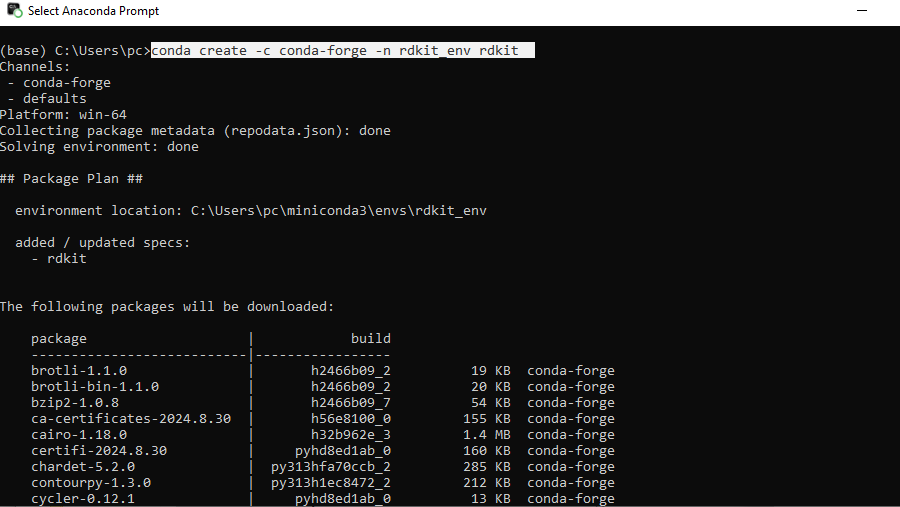

In [2]:
from IPython.display import Image, display

display(Image(filename="./PICS/conda-install.PNG", width=1000))

<div dir="rtl" style="font-size:24px;">

و پس از فعال کردن آن rdkit زا برای اجرای بخش 2 انتخاب می کنیم
</div>

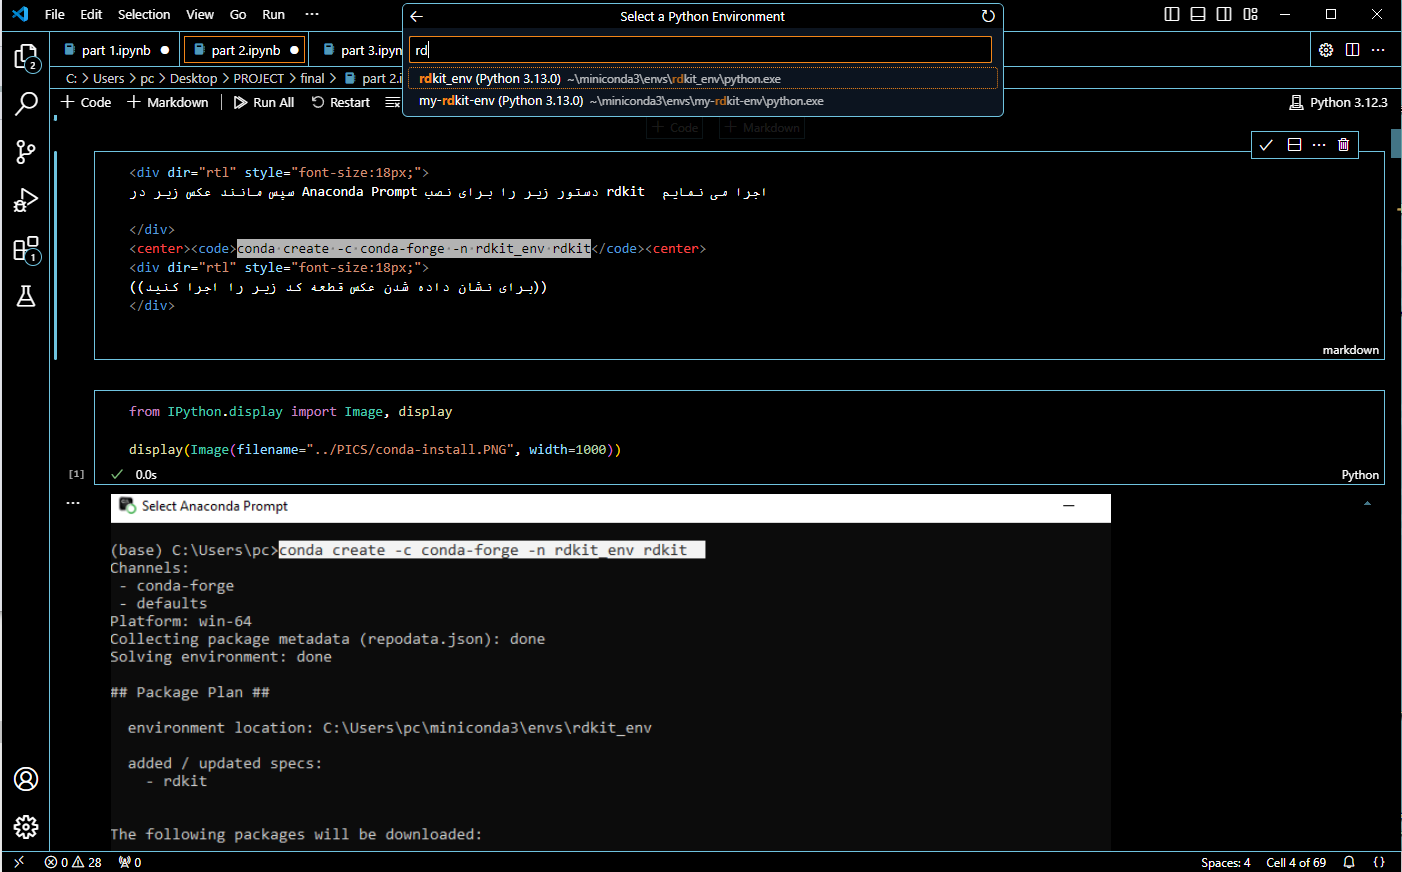

In [3]:
from IPython.display import Image, display

display(Image(filename="./PICS/rdkit.PNG", width=1000))

<div dir="rtl" style="font-size:24px;">
بارگذاری داده‌های زیست‌فعالی
</div>


In [4]:
import pandas as pd


In [5]:
df = pd.read_csv('./csv/bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0,inactive
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0,inactive
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0,inactive
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0,inactive


<div dir="rtl" style="font-size:24px;">
محاسبه توصیفگرهای لیپینسکی
</div>
<div dir="rtl" style="font-size:18px;">
کریستوفر لیپینسکی، دانشمندی در شرکت فایزر، مجموعه‌ای از قواعد سرانگشتی برای ارزیابی **شبیه‌بودن ترکیب به دارو** را ارائه داد. این شبیه‌بودن به دارو بر اساس جذب، توزیع، متابولیسم و دفع (ADME) است که به عنوان پروفایل فارماکوکینتیکی نیز شناخته می‌شود. لیپینسکی با تحلیل تمام داروهای تأیید شده توسط FDA که به صورت خوراکی فعال هستند، آنچه را که به عنوان **قاعده پنج‌گانه** یا **قاعده لیپینسکی** شناخته می‌شود، فرموله کرد.
</div>
<div dir="rtl" style="font-size:18px;">
قاعده لیپینسکی شامل موارد زیر است:
<ul>
<li>وزن مولکولی کمتر از ۵۰۰ دالتون</li>
<li>ضریب تقسیم اکتانول-آب (LogP) کمتر از ۵</li>
<li>دهنده‌های پیوند هیدروژنی کمتر از ۵</li>
<li>پذیرنده‌های پیوند هیدروژنی کمتر از ۱۰</li>
</ul>
</div>


<div dir="rtl" style="font-size:20px;">
وارد کردن کتابخانه‌ها
</div>


In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

<div dir="rtl" style="font-size:20px;">
محاسبه توصیفگرها
</div>


In [7]:


def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df.canonical_smiles)

<div dir="rtl" style="font-size:20px;">
ترکیب DataFrame‌ها
</div>
<div dir="rtl" style="font-size:18px;">
بیایید نگاهی به این دو DataFrame بیندازیم که قرار است با هم ترکیب شوند.
</div>


In [9]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
81,338.359,3.40102,0.0,5.0
82,296.366,3.44330,0.0,3.0
83,276.291,4.09564,0.0,3.0
84,278.307,3.29102,0.0,3.0


In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0,inactive
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0,inactive
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0,inactive
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0,inactive


<div dir="rtl" style="font-size:18px;">
حالا، بیایید این دو DataFrame را با هم ترکیب کنیم.
</div>


In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0,inactive,338.359,3.40102,0.0,5.0
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0,inactive,296.366,3.44330,0.0,3.0
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0,inactive,276.291,4.09564,0.0,3.0
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0,inactive,278.307,3.29102,0.0,3.0


<div dir="rtl" style="font-size:20px;">
تبدیل IC50 به pIC50
</div>
<div dir="rtl" style="font-size:18px;">
برای توزیع یکنواخت‌تر داده‌های **IC50**، آن را به مقیاس لگاریتمی منفی تبدیل می‌کنیم که در واقع **log10(IC50)-** است.
</div>
<div dir="rtl" style="font-size:18px;">
این تابع سفارشی pIC50 یک DataFrame را به‌عنوان ورودی دریافت کرده و موارد زیر را انجام می‌دهد:
<ul>
<li>مقادیر IC50 را از ستون <code>standard_value</code> گرفته و آن را با ضرب در 10<sup>-9</sup> از نانومولار به مولار تبدیل می‌کند</li>
<li>مقدار مولار را گرفته و <code>log10-</code> را اعمال می‌کند</li>
<li>ستون <code>standard_value</code> را حذف کرده و یک ستون جدید به نام <code>pIC50</code> ایجاد می‌کند</li>
</ul>
</div>


In [13]:


import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

<div dir="rtl" style="font-size:18px;">
نکته: مقادیر بیشتر از ۱۰۰,۰۰۰,۰۰۰ به ۱۰۰,۰۰۰,۰۰۰ ثابت خواهند شد؛ زیرا در غیر این صورت مقدار لگاریتمی منفی، منفی می‌شود.
</div>


In [14]:
df_combined.standard_value.describe()

count         86.000000
mean       71384.050000
std       144115.579835
min           50.000000
25%         9550.000000
50%        16000.000000
75%        48927.205000
max      1000000.000000
Name: standard_value, dtype: float64

In [15]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [16]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

<div dir="rtl" style="font-size:18px;">
ابتدا تابع norm_value() را اعمال خواهیم کرد تا مقادیر در ستون standard_value نرمال‌سازی شوند.
</div>


In [18]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,21100.0
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,226700.0
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,38700.0
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,14400.0


In [19]:
df_norm.standard_value_norm.describe()

count         86.000000
mean       71384.050000
std       144115.579835
min           50.000000
25%         9550.000000
50%        16000.000000
75%        48927.205000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [20]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


In [21]:
df_final.pIC50.describe()

count    86.000000
mean      4.848276
std       0.972872
min       3.000000
25%       4.310772
50%       4.795880
75%       5.020154
max       7.301030
Name: pIC50, dtype: float64

In [22]:
df_final.to_csv('./csv/bioactivity_data_3class_pIC50.csv', index=False)

<div dir="rtl" style="font-size:20px;">
حذف کلاس زیست‌فعالی 'حدواسط'
</div>
<div dir="rtl" style="font-size:18px;">
در اینجا، کلاس <code>حدواسط</code> را از مجموعه داده خود حذف خواهیم کرد.
</div>


In [23]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


---

<div dir="rtl" style="font-size:18px;">
تحلیل اکتشافی داده‌ها (تحلیل فضای شیمیایی) از طریق توصیف‌کننده‌های لیپینسکی
</div>


<div dir="rtl" style="font-size:18px;">
وارد کردن کتابخانه‌ها
</div>


In [24]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [25]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

<div dir="rtl" style="font-size:18px;">
نمودار فراوانی برای ۲ کلاس زیست‌فعالیت
</div>


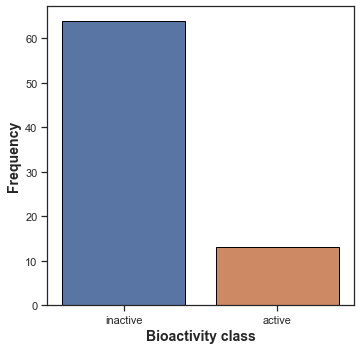

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, hue='bioactivity_class',edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('./pdfs/plot_bioactivity_class.pdf')

<div dir="rtl" style="font-size:18px;">
نمودار پراکندگی MW در مقابل LogP

می‌توان مشاهده کرد که دو کلاس زیست‌فعالیت فضای شیمیایی مشابهی را پوشش می‌دهند، همان‌طور که در نمودار پراکندگی MW در مقابل LogP مشخص است.
</div>


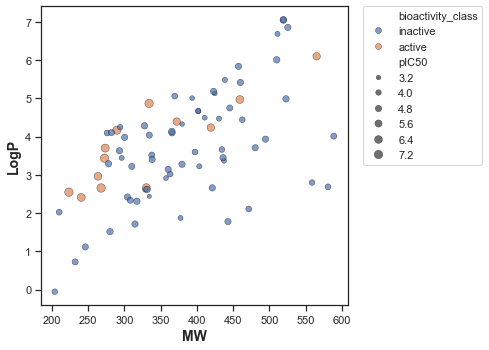

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('./pdfs/plot_MW_vs_LogP.pdf')

<div dir="rtl" style="font-size:18px;">
نمودارهای جعبه‌ای
(box plot)
</div>


<div dir="rtl" style="font-size:18px;">
مقدار pIC50
</div>


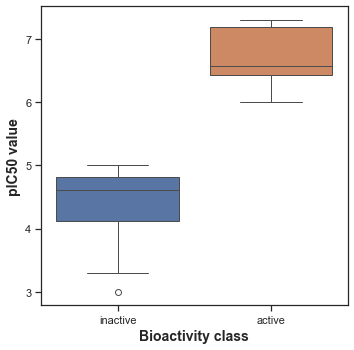

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', hue='bioactivity_class',y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('./pdfs/plot_ic50.pdf')

<div dir="rtl" style="font-size:18px;">
نصب scipy
</div>


In [29]:
! pip install scipy


  Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl (44.5 MB)


<div dir="rtl" style="font-size:18px;">
تحلیل آماری | آزمون من-ویتنی
از لینک زیر کمک گرفته شده است:
<code>https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/</code>
</div>


In [30]:
def mannwhitney(descriptor, verbose=False):
  
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(f'./csv/{filename}')

  return results

In [31]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,832.0,1.588094e-08,0.05,Different distribution (reject H0)


<div dir="rtl" style="font-size:18px;">
 وزن مولکولی
 (MW)
</div>


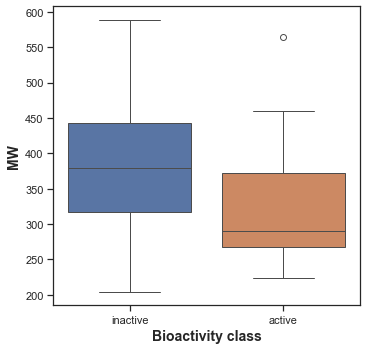

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW',hue='bioactivity_class', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('./pdfs/plot_MW.pdf')

In [33]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,249.0,0.023567,0.05,Different distribution (reject H0)


#### **LogP**

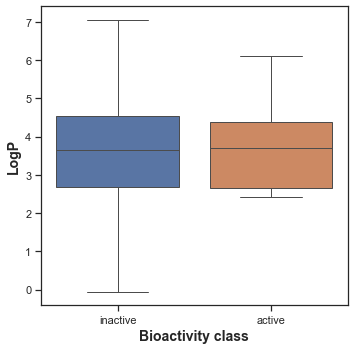

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class',hue='bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('./pdfs/plot_LogP.pdf')

<div dir="rtl" style="font-size:18px;">
تحلیل آماری | آزمون من-ویتنی
</div>


In [35]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,425.0,0.90798,0.05,Same distribution (fail to reject H0)


<div dir="rtl" style="font-size:18px;">
تعداد دهنده‌های هیدروژن (NumHDonors)
</div>


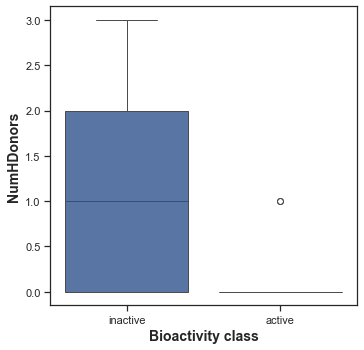

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors',hue='bioactivity_class', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('./pdfs/plot_NumHDonors.pdf')

<div dir="rtl" style="font-size:18px;">
تحلیل آماری | آزمون من-ویتنی
</div>


In [37]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,178.5,0.00062,0.05,Different distribution (reject H0)


<div dir="rtl" style="font-size:18px;">
تعداد پذیرنده‌های هیدروژن (NumHAcceptors)
</div>


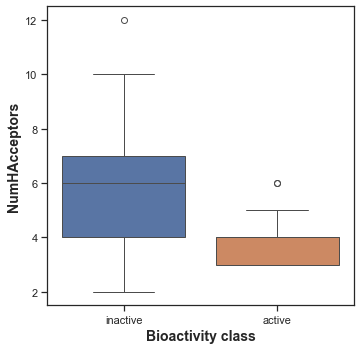

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class',hue='bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('./pdfs/plot_NumHAcceptors.pdf')

In [39]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,248.0,0.020964,0.05,Different distribution (reject H0)


<div dir="rtl" style="font-size:18px;">
تفسیر نتایج آماری
</div>


<div dir="rtl" style="font-size:18px;">
نمودارهای جعبه‌ای

###### مقادیر pIC50

با نگاهی به مقادیر pIC50، **فعال‌ها** و **غیرفعال‌ها** تفاوت آماری ***معنادار*** نشان دادند، که این امر قابل پیش‌بینی است زیرا مقادیر آستانه (``IC50 < 1,000 nM = فعال‌ها و IC50 > 10,000 nM = غیرفعال‌ها``, که معادل با ``pIC50 > 6 = فعال‌ها و pIC50 < 5 = غیرفعال‌ها``) برای تعریف فعال‌ها و غیرفعال‌ها استفاده شده‌اند.

###### توصیف‌کننده‌های لیپینسکی

از بین ۴ توصیف‌کننده لیپینسکی (MW، LogP، NumHDonors و NumHAcceptors)، فقط LogP تفاوت ***معناداری*** بین **فعال‌ها** و **غیرفعال‌ها** نشان نداد، در حالی که ۳ توصیف‌کننده دیگر (MW، NumHDonors و NumHAcceptors) تفاوت ***آماری معناداری*** بین **فعال‌ها** و **غیرفعال‌ها** نشان دادند.
</div>
